<pre>

1.Implementing Classification Algorithms:
Design and implement decision tree, SVM, and k-NN classifiers. 
Evaluate their performance using confusion matrices, ROC curves, and other metrics on a dataset of your choice.

</pre>

### Decision tree classifier

In [1]:
# installation of required libraries
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt


In [3]:
# url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
# df_new = pd.read_csv(url)

df_new = pd.read_csv("iris.csv")
df_new.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Step 2: Separating the training set and test set
x = df_new.drop("species", axis=1)  # Features
'''
dropping speicies column as i need to predict them with decision tree.
'''
y = df_new["species"]  # Target

x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:

# Splitting dataset into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
x_train2, x_validation, y_train2, y_validation = train_test_split(x_train, y_train, test_size=0.30)

In [6]:
# applying decision tree with entropy
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtree.fit(x_train2,y_train2)
predictions = dtree.predict(x_validation)
predictions2 = dtree.predict(x_test)

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_validation,predictions)
accuracy_score(y_test,predictions2)

0.9555555555555556

In [8]:
# decision tree with gini index

dtree2 = DecisionTreeClassifier(criterion='gini',max_depth=3)
dtree2.fit(x_train2,y_train2)
predictions = dtree2.predict(x_validation)
predictions2 = dtree2.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_validation,predictions)
accuracy_score(y_test,predictions2)

1.0

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

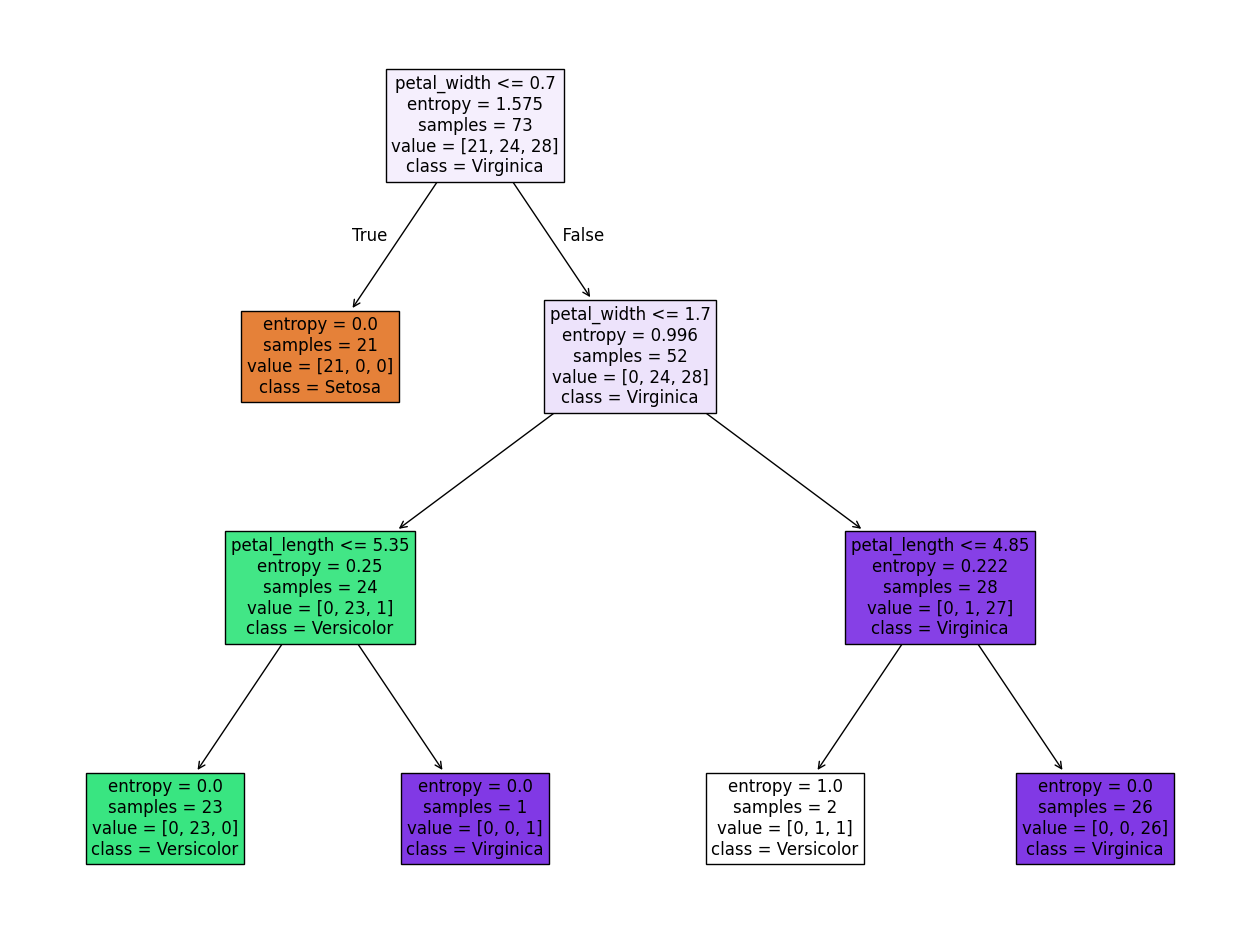

In [11]:
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree,feature_names=df_new.columns,fontsize=12,filled=True,class_names=['Setosa','Versicolor','Virginica'])

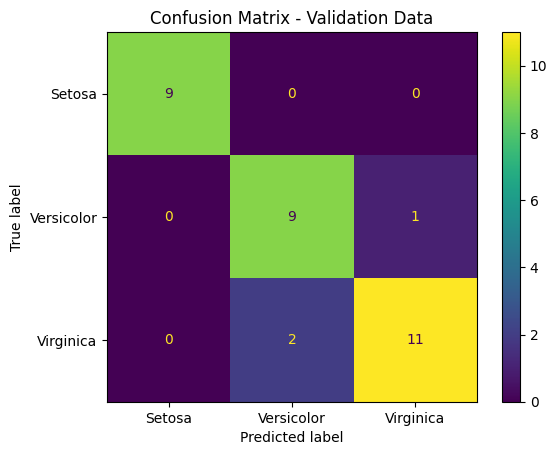

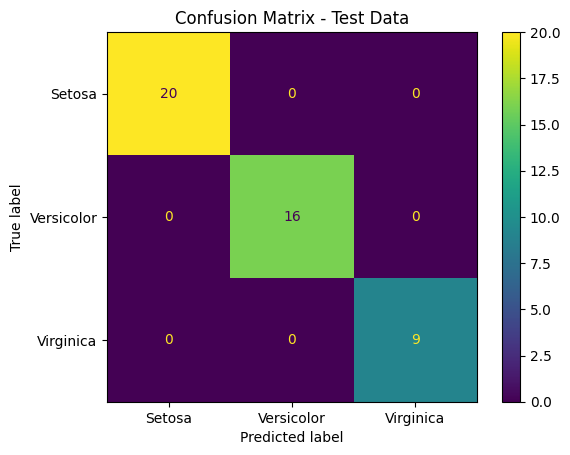

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for validation predictions
cm_validation = confusion_matrix(y_validation, predictions)
disp_validation = ConfusionMatrixDisplay(confusion_matrix=cm_validation, display_labels=['Setosa', 'Versicolor', 'Virginica'])
disp_validation.plot()
plt.title("Confusion Matrix - Validation Data")
plt.show()

# Confusion matrix for test predictions
cm_test = confusion_matrix(y_test, predictions2)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Setosa', 'Versicolor', 'Virginica'])
disp_test.plot()
plt.title("Confusion Matrix - Test Data")
plt.show()


In [14]:
from sklearn.metrics import classification_report

# Validation data metrics
print("Validation Data Metrics:")
print(classification_report(y_validation, predictions, target_names=['Setosa', 'Versicolor', 'Virginica']))

# Test data metrics
print("Test Data Metrics:")
print(classification_report(y_test, predictions2, target_names=['Setosa', 'Versicolor', 'Virginica']))


Validation Data Metrics:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         9
  Versicolor       0.82      0.90      0.86        10
   Virginica       0.92      0.85      0.88        13

    accuracy                           0.91        32
   macro avg       0.91      0.92      0.91        32
weighted avg       0.91      0.91      0.91        32

Test Data Metrics:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        20
  Versicolor       1.00      1.00      1.00        16
   Virginica       1.00      1.00      1.00         9

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



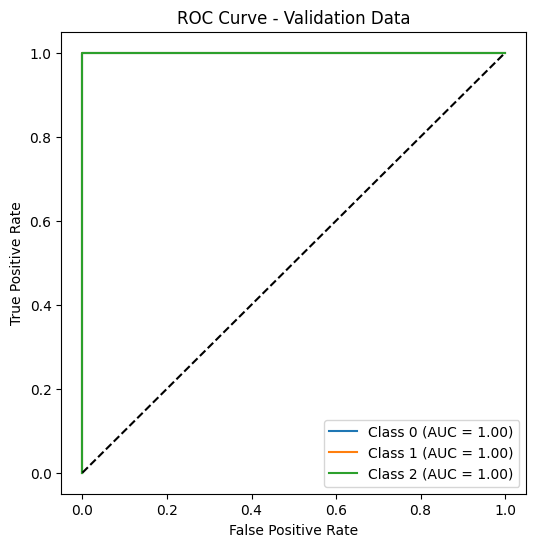

In [15]:

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_validation = le.transform(y_validation)

# Train Decision Tree with probability output
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Predict probabilities
y_score = model.predict_proba(x_validation)

# Compute ROC AUC for each class
plt.figure(figsize=(6,6))
for i in range(len(le.classes_)):
    fpr, tpr, _ = roc_curve(y_validation == i, y_score[:, i])
    auc = roc_auc_score(y_validation == i, y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Validation Data")
plt.legend()
plt.show()
